Veiklos proceso (BMP) konvertavimas į panaudos atvejų diagrama. Čia pirminis variantas, su Jupyter netbook (python kalba). 

Žemiau bendros bibliotekos

In [7]:
#naudojamos biliotekos
import graphviz as gv
from IPython.display import Image

#bendros funkcijos
def add_node(m,n,t):
    if n in m.keys():
        m[n].append(t)
    else:
        m[n] = [t]
    return

def convert_to_uc(nodes, mts):
    actors = {}
    for k in mts.keys():
        for v in mts[k]:
            if nodes[v][2] == "F":
                add_node(actors,nodes[v][1],v)
    return(actors)

def get_departments(nodes):
    deps = {}
    for k in nodes.keys():
        v = nodes[k]
        if v[1] in deps.keys():
             deps[v[1]].append(k)
        else:
            deps[v[1]] = [k]
    return(deps)

def get_edges(nodes):
    edges = []
    for k in nodes.keys():
        for t in nodes[k][0]:
            edges.append((k,t))
    return(edges)

# Duomenys
Aprašomas grafas, kuris atitinka BPM procesą. Aprašomas kaip dictionary (asociatyvus masyvas) struktūra. Raktas yra veiklos proceso pavadinimas, o pas mus grafo viršūnė. O reikšmė yra 3-matis kortežas :
1. viršūnių saras į kurias yra briaunos,  
2. takelio pavadinimas
3. tipas. S - sisteminis (start ir end), P - materialusis, F - informacinis

Laikome, kad analitikas sužymėjo veiklas procese.

In [3]:
nodes_map = {"Start": (["P1"],"Material", "S"),
         "P1": (["F1.1", "P2"], "Material", "P"),
         "P2": (["F2.1", "End"], "Material", "P"),
         "F1.1": (["F1.2"], "Department1", "F"),
         "F1.2": (["F1.3"], "Department2", "F"),
         "F1.3": (["P1"], "Department3", "F"),
         "F2.1": (["P2"], "Department3", "F"),
         "End" : ([] , "Material", "S")}

taip pat laikome, analitikas sužymėjo ir valdymo transakcijas. Čia associatyvus masyvas, kur raktas valdymo transakcijos identifikatorius, o reikšmės yra sąrašas veiklų patenkančių į tą transakciją

In [ ]:
management_trans = {"MT11" : ["P1", "F1.1", "F1.2", "F1.3"],
                    "MT21" : ["P2", "F2.1"]}

# Procesas
Pabandom atvaizduoti mūsų įvesta procesą. Visgi šiomis priemonėmis negaliu atvaizduoti takelių vienas šalia kito. Tiesiog takeliai yra veiklų grupavimai ir pats įrankis išdėsto pagal save.

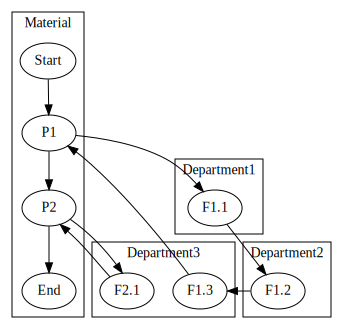

In [4]:
departments = get_departments(nodes_map)
dg = gv.Digraph()
for k in departments.keys():      
    aname = "cluster_" + k
    with dg.subgraph(name=aname) as sg:
        sg.attr(label=k)
        for n in departments[k]:            
            sg.node(n)    

dg.edges(get_edges(nodes_map))
dg


# Panaudos atvejai
Konvertuojame į panaudos atvejų modelį - kitą grafą. Ir jį atvaizduojame

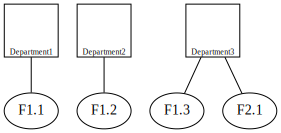

In [8]:
actors = convert_to_uc(nodes_map,management_trans)
ug = gv.Graph()                
for k in actors.keys():
    ug.node(k,shapefile="actor.png", margin="0,0.3",  fontsize = "8" ,height="0.5", labelloc="b")
    ug.edges(map(lambda x: (k, x),actors[k]))    
ug